In [0]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import numpy as np

## FILTER BY FECHA_INI AND FECHA_FIN

In [0]:
dbutils.widgets.text("Fecha de inicio (YYYY-MM-DD)", "")

In [0]:
dbutils.widgets.text("Fecha final (YYYY-MM-DD)", "")

In [0]:
Fecha_ini = dbutils.widgets.get("Fecha de inicio (YYYY-MM-DD)")
print(Fecha_ini)

2021-03-15

In [0]:
Fecha_fin = dbutils.widgets.get("Fecha final (YYYY-MM-DD)")
print(Fecha_fin)

2021-03-21

#Connection to Blob Storage

In [0]:
## access to blob storage with key

storage_account_name = "XXX"
storage_account_access_key = "XXX"

spark.conf.set("fs.azure.account.key." + storage_account_name + ".blob.core.windows.net", storage_account_access_key)

CONFIRM ACCESS TO DATA

In [0]:
%fs
ls  "wasbs://blobkompras@bsintermedio1.blob.core.windows.net/"

path,name,size
wasbs://blobkompras@bsintermedio1.blob.core.windows.net/OrdenesdecompraPORTAL1K.xlsx,OrdenesdecompraPORTAL1K.xlsx,7927129
wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_Data_Cleaned.ipynb,Proveindustriales_Data_Cleaned.ipynb,871958
wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv,Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv,7122583
wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_Dic_2/,Proveindustriales_Dic_2/,0
wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_Model_3_Cluster_Selected.ipynb,Proveindustriales_Model_3_Cluster_Selected.ipynb,7200059
wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_completo.xls,Proveindustriales_completo.xls,4473344
wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_completo.xlsx,Proveindustriales_completo.xlsx,1448157
wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_completo_y_clusters.xlsx,Proveindustriales_completo_y_clusters.xlsx,1580893
wasbs://blobkompras@bsintermedio1.blob.core.windows.net/Proveindustriales_completo_y_clusters1.xls,Proveindustriales_completo_y_clusters1.xls,4711424


MOUNT UNIT DATABRICKS BLOB STORAGE

In [0]:
%fs
ls /mnt/data/

path,name,size
dbfs:/mnt/data/OrdenesdecompraPORTAL1K.xlsx,OrdenesdecompraPORTAL1K.xlsx,7927129
dbfs:/mnt/data/Proveindustriales_Data_Cleaned.ipynb,Proveindustriales_Data_Cleaned.ipynb,871958
dbfs:/mnt/data/Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv,Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv,7122583
dbfs:/mnt/data/Proveindustriales_Dic_2/,Proveindustriales_Dic_2/,0
dbfs:/mnt/data/Proveindustriales_Model_3_Cluster_Selected.ipynb,Proveindustriales_Model_3_Cluster_Selected.ipynb,7200059
dbfs:/mnt/data/Proveindustriales_completo.xls,Proveindustriales_completo.xls,4473344
dbfs:/mnt/data/Proveindustriales_completo.xlsx,Proveindustriales_completo.xlsx,1448157
dbfs:/mnt/data/Proveindustriales_completo_y_clusters.xlsx,Proveindustriales_completo_y_clusters.xlsx,1580893
dbfs:/mnt/data/Proveindustriales_completo_y_clusters1.xls,Proveindustriales_completo_y_clusters1.xls,4711424


In [0]:
## access to the container

blob_container = 'blobkompras'
filePath = "wasbs://" + blob_container + "@" + storage_account_name + ".blob.core.windows.net/mnt/data/Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv"
##df = spark.read.format("csv").load(filePath), inferSchema = True, header = True)

## read the raw data
#df = pd.read_csv("/dbfs/mnt/data/Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv",sep =",")

# 1 DATA ACQUISITION

In [0]:
df = pd.read_excel('/dbfs/mnt/data/Proveindustriales_Dic_2/OrdenesdecompraPORTAL1K.xls', thousands='.')

In [0]:
pd.options.display.max_columns = None
pd.options.display.float_format = '{:20,.2f}'.format

In [0]:
df.columns.tolist()

Out[1057]: ['NÚMERO PEDIDO',
 'ORDEN NÚMERO',
 'FECHA ORDEN',
 'FECHA ENTREGA',
 'FECHA APROBACION',
 'CATEGORÍA',
 'SUBCATEGORIA',
 'PROVEEDOR',
 'USUARIO',
 'USUARIO APROBADOR',
 'DIRECCION PEDIDO',
 'DIRECCION FACTURACION',
 'CENTRO DE COSTOS',
 'PRESUPUESTO',
 'PORTAL',
 'ESTADO',
 'PRODUCTO O SERVICIO',
 'CODIGO PORTAL',
 'CANTIDAD PEDIDA',
 'CANTIDAD RECIBIDA',
 'PRECIO UNITARIO',
 'PRECIO UNITARIO + IVA',
 'IVA',
 'TOTAL SIN IVA',
 'TOTAL + IVA',
 'FECHA ULTIMO MOVIMIENTO',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28']

In [0]:
df = df[['NÚMERO PEDIDO', 'ORDEN NÚMERO', 'FECHA ORDEN', 'FECHA ENTREGA',
       'FECHA APROBACION', 'CATEGORÍA', 'SUBCATEGORIA', 'PROVEEDOR', 'USUARIO',
       'USUARIO APROBADOR', 'DIRECCION PEDIDO', 'DIRECCION FACTURACION',
       'CENTRO DE COSTOS', 'PRESUPUESTO', 'PORTAL', 'ESTADO',
       'PRODUCTO O SERVICIO', 'CODIGO PORTAL', 'CANTIDAD PEDIDA',
       'CANTIDAD RECIBIDA', 'PRECIO UNITARIO', 'PRECIO UNITARIO + IVA', 'IVA',
       'TOTAL SIN IVA', 'TOTAL + IVA', 'FECHA ULTIMO MOVIMIENTO']]

Describe and info of the df

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23083 entries, 0 to 23082
Data columns (total 26 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 NÚMERO PEDIDO 23083 non-null object 
 1 ORDEN NÚMERO 23083 non-null object 
 2 FECHA ORDEN 23083 non-null object 
 3 FECHA ENTREGA 18770 non-null object 
 4 FECHA APROBACION 21950 non-null object 
 5 CATEGORÍA 23083 non-null object 
 6 SUBCATEGORIA 23083 non-null object 
 7 PROVEEDOR 23083 non-null object 
 8 USUARIO 23083 non-null object 
 9 USUARIO APROBADOR 21950 non-null object 
 10 DIRECCION PEDIDO 23083 non-null object 
 11 DIRECCION FACTURACION 10828 non-null object 
 12 CENTRO DE COSTOS 16672 non-null object 
 13 PRESUPUESTO 18581 non-null object 
 14 PORTAL 23083 non-null object 
 15 ESTADO 23083 non-null object 
 16 PRODUCTO O SERVICIO 23083 non-null object 
 17 CODIGO PORTAL 18223 non-null object 
 18 CANTIDAD PEDIDA 23083 non-null float64
 19 CANTIDAD RECIBIDA 16013 non-null float64
 20 PRECIO UNITARIO 23083 non-null int64 
 21 PRECIO UNITARIO + IVA 23083 non-null int64 
 22 IVA 23083 non-null int64 
 23 TOTAL SIN IVA 23083 non-null int64 
 24 TOTAL + IVA 23083 non-null int64 
 25 FECHA ULTIMO MOVIMIENTO 23083 non-null object 
dtypes: float64(2), int64(5), object(19)
memory usage: 4.6+ MB

In [0]:
df[(df['FECHA ORDEN'] > str(Fecha_ini)) & (df['FECHA ORDEN'] < str(Fecha_fin))]

Out[1060]:

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,USUARIO,USUARIO APROBADOR,DIRECCION PEDIDO,DIRECCION FACTURACION,CENTRO DE COSTOS,PRESUPUESTO,PORTAL,ESTADO,PRODUCTO O SERVICIO,CODIGO PORTAL,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO
7846,# 46680,# 895,2021-03-20,2021-03-20,2021-03-22,Generación y distribución de Energía,Generación de energía,Proveedor 242,Usuario solicitante 11,Usuario Aprobador 6,Direccion 9,NaN,Centro de costos 9,Presupuesto 514,Portal comprador 1,Recibido,GENERADOR PORTATIL 8 KW DOBLE VOL FORD,0156FG9250PE,1.00,1.00,3740344,4451009,710665,3740344,4451009,2021-03-26
7847,# 46679,# 1040,2021-03-20,2021-03-23,NaN,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 123,Usuario solicitante 4,NaN,Direccion 3,NaN,Centro de costos 4,NaN,Portal comprador 2,Orden Rechazada,Costilla de cerdo San Luis E.V,1038155,100.00,nan,15691,15691,0,1569100,1569100,2021-03-23
7848,# 46678,# 1039,2021-03-20,2021-03-23,2021-03-20,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 84,Usuario solicitante 4,Usuario Aprobador 4,Direccion 3,NaN,Centro de costos 45,NaN,Portal comprador 2,Recibido,QUESO CHEDDAR TAJADO X 500g,NaN,20.00,20.00,9000,9000,0,180000,180000,2021-03-25
7849,# 46677,# 894,2021-03-19,2021-04-01,2021-03-29,Textiles,"Fibra, hilos e hilados",Proveedor 238,Usuario solicitante 21,Usuario Aprobador 38,Direccion 43,NaN,Centro de costos 20,Presupuesto 515,Portal comprador 1,Recibido,Tapabocas Antifluído - Reutilizable,0531,10.00,10.00,2000,2000,0,20000,20000,2021-04-27
7850,# 46676,# 893,2021-03-19,2021-04-01,2021-03-29,Dotación y elementos de protección personal,Elementos de bioseguridad,Proveedor 179,Usuario solicitante 21,Usuario Aprobador 38,Direccion 43,NaN,Centro de costos 20,Presupuesto 515,Portal comprador 1,Recibido,ALCOHOL ANTISEPTICO 1OOO ML,103,6.00,6.00,9000,9000,0,54000,54000,2021-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7945,# 46644,# 879,2021-03-16,2021-03-18,2021-03-16,Vigilancia y seguridad industrial,Seguridad y protección personal,Proveedor 12,Usuario solicitante 8,Usuario Aprobador 6,Direccion 2,NaN,Centro de costos 12,Presupuesto 520,Portal comprador 1,Recibido,GUANTE KLEENGUARD G40 POLIURETANO X PAR TALLA ...,158160064,3.00,3.00,7163,8524,1361,21489,25572,2021-03-20
7946,# 46644,# 878,2021-03-16,2021-03-18,2021-03-16,"Aseo, Cafetería y Oficina",Elementos de aseo y limpieza,Proveedor 59,Usuario solicitante 8,Usuario Aprobador 6,Direccion 2,NaN,Centro de costos 12,Presupuesto 520,Portal comprador 1,Recibido,Guante Nitrilo Azul talla L,1K6903,3.00,3.00,65000,65000,0,195000,195000,2021-03-20
7947,# 46644,# 878,2021-03-16,2021-03-18,2021-03-16,"Aseo, Cafetería y Oficina",Elementos de aseo y limpieza,Proveedor 59,Usuario solicitante 8,Usuario Aprobador 6,Direccion 2,NaN,Centro de costos 12,Presupuesto 520,Portal comprador 1,Recibido,Guante Nitrilo Azul talla M,1K6902,3.00,3.00,65000,65000,0,195000,195000,2021-03-20
7948,# 46643,# 1023,2021-03-16,2021-03-18,2021-03-16,Alimentos y Bebidas,Productos de panadería,Proveedor 23,Usuario solicitante 4,Usuario Aprobador 4,Direccion 3,NaN,Centro de costos 4,NaN,Portal comprador 2,Recibido,PAN DE HAMBURGUESA CON AJONJOLÍ NEGRO x 4 UND,NaN,100.00,100.00,3000,3000,0,300000,300000,2021-03-18


In [0]:
df.head()

Out[1061]:

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,USUARIO,USUARIO APROBADOR,DIRECCION PEDIDO,DIRECCION FACTURACION,CENTRO DE COSTOS,PRESUPUESTO,PORTAL,ESTADO,PRODUCTO O SERVICIO,CODIGO PORTAL,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO
0,# 49561,# 2582,2021-11-10,2021-11-10,2021-11-10,Eléctricos y Electrónicos,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Usuario solicitante 1,Usuario Aprobador 1,Direccion 1,NaN,Centro de costos 1,Presupuesto 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,1200035000063,2.00,nan,23364,27803,4439,46728,55606,2021-11-10
1,# 49560,# 2581,2021-11-10,2021-11-11,2021-11-10,Mercadeo y publicidad,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,Direccion 1,NaN,Centro de costos 2,Presupuesto 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1K15774,1.00,1.00,1476972,1757597,280625,1476972,1757597,2021-11-10
2,# 49559,# 2580,2021-11-10,2021-11-10,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Usuario solicitante 3,Usuario Aprobador 3,Direccion 2,NaN,Centro de costos 3,Presupuesto 3,Portal comprador 1,Orden en Proceso,Lasagna,1K7609,10.00,nan,15500,15500,0,155000,155000,2021-11-10
3,# 49558,# 1892,2021-11-10,2021-11-12,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Usuario solicitante 4,Usuario Aprobador 4,Direccion 3,NaN,Centro de costos 4,Presupuesto 4,Portal comprador 2,Orden en Proceso,Pecho de Res Limpio/Sin Grasa,1K15459,50.00,nan,22000,22000,0,1100000,1100000,2021-11-10
4,# 49557,# 1,2021-11-10,2021-11-09,2021-11-10,Imprenta y litografía,Otra,Proveedor 5,Usuario solicitante 5,Usuario Aprobador 5,Direccion 4,NaN,NaN,NaN,Portal comprador 3,Recibido,"LIBRO CABEZA, CORAZON Y MANOS",1K15761,7.00,7.00,92084,109580,17496,644588,767060,2021-11-10


In [0]:
df.shape

Out[1062]: (23083, 26)

# DATA PREPARATION

# 1. Data integration

There are no more data integration to join. I have only the .xlsx file

# 2. IRRELEVANT VARIABLES

## 2.1 Duplicated rows

In [0]:
df.duplicated(keep='first').sum()

Out[1063]: 691

In [0]:
df.drop_duplicates(keep='first', inplace=True)

## 2.2 Irrelevant columns

Until we know the objective of this project, we couldn´t drop some variables, but for now, let´s do a clasical ML model

In [0]:
df.head(2)

Out[1065]:

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,USUARIO,USUARIO APROBADOR,DIRECCION PEDIDO,DIRECCION FACTURACION,CENTRO DE COSTOS,PRESUPUESTO,PORTAL,ESTADO,PRODUCTO O SERVICIO,CODIGO PORTAL,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO
0,# 49561,# 2582,2021-11-10,2021-11-10,2021-11-10,Eléctricos y Electrónicos,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Usuario solicitante 1,Usuario Aprobador 1,Direccion 1,NaN,Centro de costos 1,Presupuesto 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,1200035000063,2.00,nan,23364,27803,4439,46728,55606,2021-11-10
1,# 49560,# 2581,2021-11-10,2021-11-11,2021-11-10,Mercadeo y publicidad,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,Direccion 1,NaN,Centro de costos 2,Presupuesto 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1K15774,1.00,1.00,1476972,1757597,280625,1476972,1757597,2021-11-10


In [0]:
for i in df.columns:
    print('------------------', i, '------------------' )
    percentage = df[i].value_counts()/df[i].count()*100
    
    print(percentage)

------------------ NÚMERO PEDIDO ------------------
# 47594 0.55
# 47595 0.55
# 47951 0.54
# 49268 0.50
# 48135 0.33
 ... 
# 41032 0.00
# 40546 0.00
# 47165 0.00
# 38013 0.00
# 45192 0.00
Name: NÚMERO PEDIDO, Length: 7133, dtype: float64
------------------ ORDEN NÚMERO ------------------
# 3 0.85
# 4 0.78
# 7 0.74
# 22 0.60
# 2 0.52
 ... 
# 1980 0.00
# 2006 0.00
# 2030 0.00
# 2399 0.00
# 2470 0.00
Name: ORDEN NÚMERO, Length: 2584, dtype: float64
------------------ FECHA ORDEN ------------------
2019-11-30 1.61
2019-12-02 1.36
2019-11-27 1.34
2019-11-28 1.32
2021-06-15 1.17
 ... 
2020-05-11 0.00
2020-07-06 0.00
2020-02-25 0.00
2020-06-30 0.00
2018-09-28 0.00
Name: FECHA ORDEN, Length: 727, dtype: float64
------------------ FECHA ENTREGA ------------------
2019-11-30 2.00
2019-12-02 1.69
2019-11-27 1.66
2019-11-28 1.63
2021-07-30 1.46
 ... 
2020-03-06 0.01
2020-08-31 0.01
2020-03-23 0.01
2021-11-07 0.01
2020-10-03 0.01
Name: FECHA ENTREGA, Length: 531, dtype: float64
------------------ FECHA APROBACION ------------------
2020-01-24 20.25
2020-02-13 3.04
2020-06-10 2.30
2021-10-28 1.11
2021-08-05 0.89
 ... 
2020-09-09 0.00
2020-05-11 0.00
2020-02-26 0.00
2019-10-16 0.00
2019-03-18 0.00
Name: FECHA APROBACION, Length: 645, dtype: float64
------------------ CATEGORÍA ------------------
Alimentos y Bebidas 30.98
Vigilancia y seguridad industrial 27.01
Aseo, Cafetería y Oficina 17.14
Dotación y elementos de protección personal 5.35
Ferreteria 3.53
Almacenamiento y empaques 2.06
Vehículos y repuestos 1.64
Químicos y derivados 1.60
Construcción y Mantenimiento 1.30
Servicios Profesionales 1.10
Mercadeo y publicidad 0.95
Manufactura 0.92
Logística y transporte 0.84
Eléctricos y Electrónicos 0.76
Mobiliario y decoración 0.74
Tecnología e información 0.69
Textiles 0.67
Moda y accesorios 0.65
Imprenta y litografía 0.43
Ingeniería e Investigación 0.41
Compras Sostenibles 0.21
Gestión ambiental 0.19
Salud y Medicina 0.19
Hogar y electrodomésticos 0.15
Vigilancia y seguridad 0.13
Viajes, Eventos y Entretenimiento 0.08
Medicina y Salud 0.06
Cuidado personal y Belleza 0.04
Deporte y recreación 0.03
Servicios Públicos 0.03
Agroindustrial 0.02
Minería 0.02
Generación y distribución de Energía 0.02
Gestión inmobiliaria 0.02
Producción audiovisual 0.00
Educación y formación empresarial 0.00
Name: CATEGORÍA, dtype: float64
------------------ SUBCATEGORIA ------------------
Seguridad y protección personal 27.00
Alimentos preparados y conservados 10.01
Elementos de aseo y limpieza 8.92
Elementos de papelería 7.23
Bebidas 5.93
 ... 
Joyería 0.00
Componentes pasivos discretos 0.00
Medios impresos 0.00
Instalaciones de tubos y tuberías 0.00
Extracción y producción de gas y petróleo 0.00
Name: SUBCATEGORIA, Length: 149, dtype: float64
------------------ PROVEEDOR ------------------
Proveedor 301 24.29
Proveedor 59 6.93
Proveedor 28 6.34
Proveedor 26 5.43
Proveedor 321 4.33
 ... 
Proveedor 375 0.00
Proveedor 246 0.00
Proveedor 199 0.00
Proveedor 319 0.00
Proveedor 312 0.00
Name: PROVEEDOR, Length: 405, dtype: float64
------------------ USUARIO ------------------
Usuario solicitante 122 24.29
Usuario solicitante 129 14.83
Usuario solicitante 4 9.84
Usuario solicitante 67 7.16
Usuario solicitante 11 4.83
 ... 
Usuario solicitante 105 0.00
Usuario solicitante 124 0.00
Usuario solicitante 52 0.00
Usuario solicitante 108 0.00
Usuario solicitante 112 0.00
Name: USUARIO, Length: 136, dtype: float64
------------------ USUARIO APROBADOR ------------------
Usuario Aprobador 60 25.58
Usuario Aprobador 66 15.53
Usuario Aprobador 4 10.09
Usuario Aprobador 38 7.05
Usuario Aprobador 6 6.69
 ... 
Usuario Aprobador 44 0.00
Usuario Aprobador 5 0.00
Usuario Aprobador 71 0.00
Usuario Aprobador 65 0.00
Usuario Aprobador 39 0.00
Name: USUARIO APROBADOR, Length: 72, dtype: float64
------------------ DIRECCION PEDIDO ------------------
Direccion 3 14.97
Direccion 163 14.83
Direccion 2 8.18
Direccion 1 6.30
Direccion 43 5.27
 ... 
Direccion 54 0.00
Direccion 17 0.00
Direccion 46 0

In [0]:
df.columns = df.columns.str.replace(' ', '_')

In [0]:
df.columns

Out[1068]: Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'FECHA_ORDEN', 'FECHA_ENTREGA',
 'FECHA_APROBACION', 'CATEGORÍA', 'SUBCATEGORIA', 'PROVEEDOR', 'USUARIO',
 'USUARIO_APROBADOR', 'DIRECCION_PEDIDO', 'DIRECCION_FACTURACION',
 'CENTRO_DE_COSTOS', 'PRESUPUESTO', 'PORTAL', 'ESTADO',
 'PRODUCTO_O_SERVICIO', 'CODIGO_PORTAL', 'CANTIDAD_PEDIDA',
 'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO', 'PRECIO_UNITARIO_+_IVA', 'IVA',
 'TOTAL_SIN_IVA', 'TOTAL_+_IVA', 'FECHA_ULTIMO_MOVIMIENTO'],
 dtype='object')

In [0]:
cols_to_drop = ['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'FECHA_ENTREGA','FECHA_APROBACION', 'USUARIO', 'USUARIO_APROBADOR', 
                'DIRECCION_PEDIDO', 'DIRECCION_FACTURACION', 'CENTRO_DE_COSTOS', 'PRESUPUESTO', 'CODIGO_PORTAL', 
                'PRECIO_UNITARIO_+_IVA', 'TOTAL_+_IVA', 'FECHA_ULTIMO_MOVIMIENTO'
               ]

In [0]:
df.drop(cols_to_drop, inplace=True, axis=1)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22392 entries, 0 to 23082
Data columns (total 12 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 FECHA_ORDEN 22392 non-null object 
 1 CATEGORÍA 22392 non-null object 
 2 SUBCATEGORIA 22392 non-null object 
 3 PROVEEDOR 22392 non-null object 
 4 PORTAL 22392 non-null object 
 5 ESTADO 22392 non-null object 
 6 PRODUCTO_O_SERVICIO 22392 non-null object 
 7 CANTIDAD_PEDIDA 22392 non-null float64
 8 CANTIDAD_RECIBIDA 15325 non-null float64
 9 PRECIO_UNITARIO 22392 non-null int64 
 10 IVA 22392 non-null int64 
 11 TOTAL_SIN_IVA 22392 non-null int64 
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB

# 3. STATISTICAL DESCRIPTION

In [0]:
df.describe()

Out[1072]:

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
count,"22,392.00","15,325.00","22,392.00","22,392.00","22,392.00"
mean,196.68,72.36,"74,075.31","11,499.70","477,558.94"
std,"1,976.19","1,063.97","644,263.68","104,931.32","3,160,637.57"
min,0.27,0.00,0.00,0.00,0.00
25%,2.00,2.00,"1,861.00",93.00,"29,412.00"
50%,7.00,5.00,"11,400.00","1,040.00","90,756.00"
75%,40.00,19.00,"32,222.00","5,588.00","294,118.00"
max,"120,000.00","53,620.00","33,242,814.00","6,316,135.00","299,185,326.00"


In [0]:
df['PRECIO_UNITARIO'] = pd.to_numeric(df['PRECIO_UNITARIO'], downcast="float")
df['IVA'] = pd.to_numeric(df['IVA'], downcast="float")
df['TOTAL_SIN_IVA'] = pd.to_numeric(df['TOTAL_SIN_IVA'], downcast="float")

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22392 entries, 0 to 23082
Data columns (total 12 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 FECHA_ORDEN 22392 non-null object 
 1 CATEGORÍA 22392 non-null object 
 2 SUBCATEGORIA 22392 non-null object 
 3 PROVEEDOR 22392 non-null object 
 4 PORTAL 22392 non-null object 
 5 ESTADO 22392 non-null object 
 6 PRODUCTO_O_SERVICIO 22392 non-null object 
 7 CANTIDAD_PEDIDA 22392 non-null float64
 8 CANTIDAD_RECIBIDA 15325 non-null float64
 9 PRECIO_UNITARIO 22392 non-null float32
 10 IVA 22392 non-null float32
 11 TOTAL_SIN_IVA 22392 non-null float32
dtypes: float32(3), float64(2), object(7)
memory usage: 2.0+ MB

In [0]:
df['FECHA_ORDEN'] = pd.to_datetime(df['FECHA_ORDEN'], format='%Y-%m-%d')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22392 entries, 0 to 23082
Data columns (total 12 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 FECHA_ORDEN 22392 non-null datetime64[ns]
 1 CATEGORÍA 22392 non-null object 
 2 SUBCATEGORIA 22392 non-null object 
 3 PROVEEDOR 22392 non-null object 
 4 PORTAL 22392 non-null object 
 5 ESTADO 22392 non-null object 
 6 PRODUCTO_O_SERVICIO 22392 non-null object 
 7 CANTIDAD_PEDIDA 22392 non-null float64 
 8 CANTIDAD_RECIBIDA 15325 non-null float64 
 9 PRECIO_UNITARIO 22392 non-null float32 
 10 IVA 22392 non-null float32 
 11 TOTAL_SIN_IVA 22392 non-null float32 
dtypes: datetime64[ns](1), float32(3), float64(2), object(6)
memory usage: 2.0+ MB

## By year

In [0]:
df_Y = df.groupby(pd.Grouper(key='FECHA_ORDEN', freq="Y")).sum()
df_Y.head()

Out[1077]:

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
FECHA_ORDEN,,,,,
2018-12-31,"2,825,660.70",962.00,"56,846,176.00","10,468,057.00","660,102,848.00"
2019-12-31,"500,896.00","167,714.00","169,135,712.00","27,660,022.00","2,787,268,864.00"
2020-12-31,"298,243.78","261,158.96","158,323,184.00","25,843,618.00","2,755,058,176.00"
2021-12-31,"779,247.15","679,086.10","1,274,389,248.00","193,529,664.00","4,491,069,952.00"


In [0]:
px.bar(df_Y, y='TOTAL_SIN_IVA')

Out[1078]:

## By Month

In [0]:
df_M = df.groupby(pd.Grouper(key='FECHA_ORDEN', freq="M")).sum()
df_M

Out[1079]:

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
FECHA_ORDEN,,,,,
2018-04-30,22.00,22.00,"126,722.00","24,078.00","643,529.00"
2018-05-31,"179,909.93",182.00,"17,952,810.00","3,397,901.00","86,983,344.00"
2018-06-30,"481,225.57",160.00,"16,467,157.00","2,910,354.00","101,410,232.00"
2018-07-31,"250,286.19",0.00,"12,030,855.00","2,273,663.00","106,887,144.00"
2018-08-31,"323,701.00",583.00,"3,449,758.00","642,979.00","85,446,688.00"
2018-09-30,"333,671.01",12.00,"2,394,064.00","402,736.00","80,714,904.00"
2018-10-31,"450,440.00",0.00,"3,675,876.00","683,678.00","105,108,312.00"
2018-11-30,"457,966.00",0.00,"466,431.00","81,481.00","55,557,620.00"
2018-12-31,"348,439.00",3.00,"282,501.00","51,187.00","37,351,064.00"


In [0]:
px.bar(df_M, y='TOTAL_SIN_IVA')

Out[1080]:

## Compañía compradora

In [0]:
df_Comp = df.groupby('PORTAL').sum()
df_Comp.sort_values(by='TOTAL_SIN_IVA', inplace=True, ascending=False)
df_Comp

Out[1081]:

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
PORTAL,,,,,
Portal comprador 24,"231,092.00","231,092.00","217,180,464.00","41,264,144.00","4,293,598,464.00"
Portal comprador 1,"432,971.20","414,527.30","1,085,985,536.00","166,869,024.00","2,742,179,328.00"
Portal comprador 2,"457,901.23","367,442.26","100,662,184.00","12,458,101.00","1,611,188,352.00"
Portal comprador 6,"21,637.00","10,844.00","41,397,468.00","7,806,431.00","555,513,088.00"
Portal comprador 18,"56,940.00","53,874.00","1,447,513.00","267,510.00","436,416,352.00"
Portal comprador 29,"2,838,287.00",147.00,"2,838,362.00","494,922.00","409,359,680.00"
Portal comprador 30,"319,852.70",695.00,"15,856,626.00","2,926,829.00","210,401,360.00"
Portal comprador 4,"4,250.00","3,861.00","76,941,864.00","10,217,062.00","160,436,176.00"
Portal comprador 8,"1,307.00",463.00,"56,746,584.00","9,124,132.00","102,270,872.00"


In [0]:
px.bar(df_Comp, y='TOTAL_SIN_IVA')

Out[1082]:

In [0]:
df_Comp_count = df.groupby('PORTAL').count()
df_Comp_count.sort_values(by='TOTAL_SIN_IVA', inplace=True, ascending=False)
df_Comp_count

Out[1083]:

,FECHA_ORDEN,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
PORTAL,,,,,,,,,,,
Portal comprador 1,6563,6563,6563,6563,6563,6563,6563,5577,6563,6563,6563
Portal comprador 24,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439
Portal comprador 2,3863,3863,3863,3863,3863,3863,3863,3095,3863,3863,3863
Portal comprador 29,3320,3320,3320,3320,3320,3320,3320,2,3320,3320,3320
Portal comprador 6,850,850,850,850,850,850,850,230,850,850,850
Portal comprador 30,760,760,760,760,760,760,760,29,760,760,760
Portal comprador 4,361,361,361,361,361,361,361,288,361,361,361
Portal comprador 8,318,318,318,318,318,318,318,107,318,318,318
Portal comprador 5,296,296,296,296,296,296,296,256,296,296,296


# 4. DATA CLEANING

## 4.1 Remove outliers

There are not outliers in the DS

In [0]:
df.describe()

Out[1084]:

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
count,"22,392.00","15,325.00","22,392.00","22,392.00","22,392.00"
mean,196.68,72.36,"74,075.30","11,499.70","477,559.00"
std,"1,976.19","1,063.97","644,263.69","104,931.32","3,160,637.50"
min,0.27,0.00,0.00,0.00,0.00
25%,2.00,2.00,"1,861.00",93.00,"29,412.00"
50%,7.00,5.00,"11,400.00","1,040.00","90,756.00"
75%,40.00,19.00,"32,222.00","5,588.00","294,118.00"
max,"120,000.00","53,620.00","33,242,814.00","6,316,135.00","299,185,312.00"


## 4.2 Fill NA

In [0]:
df.isna().sum()/len(df)*100

Out[1085]: FECHA_ORDEN 0.00
CATEGORÍA 0.00
SUBCATEGORIA 0.00
PROVEEDOR 0.00
PORTAL 0.00
ESTADO 0.00
PRODUCTO_O_SERVICIO 0.00
CANTIDAD_PEDIDA 0.00
CANTIDAD_RECIBIDA 31.56
PRECIO_UNITARIO 0.00
IVA 0.00
TOTAL_SIN_IVA 0.00
dtype: float64

'CANTIDAD_RECIBIDA': to create other variable later

In [0]:
df.loc[df['CANTIDAD_RECIBIDA'].isna(), 'CANTIDAD_RECIBIDA'] = 0

In [0]:
df.isna().sum()/len(df)*100

Out[1087]: FECHA_ORDEN 0.00
CATEGORÍA 0.00
SUBCATEGORIA 0.00
PROVEEDOR 0.00
PORTAL 0.00
ESTADO 0.00
PRODUCTO_O_SERVICIO 0.00
CANTIDAD_PEDIDA 0.00
CANTIDAD_RECIBIDA 0.00
PRECIO_UNITARIO 0.00
IVA 0.00
TOTAL_SIN_IVA 0.00
dtype: float64

# 5. FEATURE ENGINEERING (NEW VARIABLES)

## SUMARIZE CATEGORICAL VARIABLES

In [0]:
df.select_dtypes(['object', 'category']).columns

Out[1088]: Index(['CATEGORÍA', 'SUBCATEGORIA', 'PROVEEDOR', 'PORTAL', 'ESTADO',
 'PRODUCTO_O_SERVICIO'],
 dtype='object')

## Categoría

In [0]:
df_CAT = df.groupby('CATEGORÍA').sum()
df_CAT.sort_values(by='TOTAL_SIN_IVA', inplace=True, ascending=False)
df_CAT

Out[1089]:

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
CATEGORÍA,,,,,
Vigilancia y seguridad industrial,"234,476.00","233,765.00","233,409,776.00","44,227,524.00","4,339,572,224.00"
Alimentos y Bebidas,"2,763,255.73","85,211.76","106,555,080.00","13,873,146.00","1,928,684,544.00"
Construcción y Mantenimiento,"2,502.00","2,161.00","303,148,960.00","40,068,148.00","882,860,608.00"
Dotación y elementos de protección personal,"27,001.00","14,403.00","46,851,856.00","8,302,189.00","715,481,920.00"
Servicios Profesionales,298.50,222.50,"396,780,192.00","74,664,856.00","602,906,112.00"
Químicos y derivados,"44,667.70","41,351.00","23,887,690.00","1,314,261.00","383,131,712.00"
Almacenamiento y empaques,"322,955.70","200,696.80","8,105,723.00","1,482,934.00","362,158,528.00"
Vehículos y repuestos,"17,334.00","13,482.00","51,944,152.00","9,400,447.00","209,335,776.00"
Mercadeo y publicidad,"100,534.00","71,441.00","62,464,332.00","9,526,379.00","195,689,648.00"


In [0]:
px.bar(df_CAT, y='TOTAL_SIN_IVA')

Out[1090]:

In [0]:
px.bar(df_CAT, y='CANTIDAD_PEDIDA')

Out[1091]:

### Top CATEGORIA

In [0]:
df_CAT = df['CATEGORÍA'].value_counts()/len(df['CATEGORÍA'])*100
df_CAT

Out[1092]: Alimentos y Bebidas 30.98
Vigilancia y seguridad industrial 27.01
Aseo, Cafetería y Oficina 17.14
Dotación y elementos de protección personal 5.35
Ferreteria 3.53
Almacenamiento y empaques 2.06
Vehículos y repuestos 1.64
Químicos y derivados 1.60
Construcción y Mantenimiento 1.30
Servicios Profesionales 1.10
Mercadeo y publicidad 0.95
Manufactura 0.92
Logística y transporte 0.84
Eléctricos y Electrónicos 0.76
Mobiliario y decoración 0.74
Tecnología e información 0.69
Textiles 0.67
Moda y accesorios 0.65
Imprenta y litografía 0.43
Ingeniería e Investigación 0.41
Compras Sostenibles 0.21
Gestión ambiental 0.19
Salud y Medicina 0.19
Hogar y electrodomésticos 0.15
Vigilancia y seguridad 0.13
Viajes, Eventos y Entretenimiento 0.08
Medicina y Salud 0.06
Cuidado personal y Belleza 0.04
Deporte y recreación 0.03
Servicios Públicos 0.03
Agroindustrial 0.02
Minería 0.02
Generación y distribución de Energía 0.02
Gestión inmobiliaria 0.02
Producción audiovisual 0.00
Educación y formación empresarial 0.00
Name: CATEGORÍA, dtype: float64

In [0]:
acum_conteo = 0
for i in range (0, len(df_CAT)):
    acum = df_CAT.iloc[i]
    acum_conteo += acum
    if acum_conteo > 80:
        break
    if i == 5:
        break
print(i+1, acum_conteo)

4 80.49303322615219

In [0]:
top_categoria = df_CAT.index[0:i+1].tolist()
top_categoria

Out[1094]: ['Alimentos y Bebidas',
 'Vigilancia y seguridad industrial',
 'Aseo, Cafetería y Oficina',
 'Dotación y elementos de protección personal']

In [0]:
df.loc[~df['CATEGORÍA'].isin(top_categoria), 'CATEGORÍA'] =  'Otros'

In [0]:
df.head()

Out[1096]:

,FECHA_ORDEN,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,PORTAL,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,2021-11-10,Otros,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,2.00,0.00,"23,364.00","4,439.00","46,728.00"
1,2021-11-10,Otros,Publicidad,Proveedor 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1.00,1.00,"1,476,972.00","280,625.00","1,476,972.00"
2,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Portal comprador 1,Orden en Proceso,Lasagna,10.00,0.00,"15,500.00",0.00,"155,000.00"
3,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Portal comprador 2,Orden en Proceso,Pecho de Res Limpio/Sin Grasa,50.00,0.00,"22,000.00",0.00,"1,100,000.00"
4,2021-11-10,Otros,Otra,Proveedor 5,Portal comprador 3,Recibido,"LIBRO CABEZA, CORAZON Y MANOS",7.00,7.00,"92,084.00","17,496.00","644,588.00"


In [0]:
df['CATEGORÍA'].value_counts()

Out[1097]: Alimentos y Bebidas 6938
Vigilancia y seguridad industrial 6049
Otros 4368
Aseo, Cafetería y Oficina 3838
Dotación y elementos de protección personal 1199
Name: CATEGORÍA, dtype: int64

### Top  SUBCATEGORIA

In [0]:
df_SUBCAT = df['SUBCATEGORIA'].value_counts()/len(df['SUBCATEGORIA'])*100
df_SUBCAT

Out[1098]: Seguridad y protección personal 27.00
Alimentos preparados y conservados 10.01
Elementos de aseo y limpieza 8.92
Elementos de papelería 7.23
Bebidas 5.93
 ... 
Joyería 0.00
Componentes pasivos discretos 0.00
Medios impresos 0.00
Instalaciones de tubos y tuberías 0.00
Extracción y producción de gas y petróleo 0.00
Name: SUBCATEGORIA, Length: 149, dtype: float64

In [0]:
acum_conteo = 0
for i in range (0, len(df_SUBCAT)):
    acum = df_SUBCAT.iloc[i]
    acum_conteo += acum
    if acum_conteo > 80:
        break
    if i == 7:
        break
print(i, acum_conteo)

7 68.359235441229

In [0]:
top_subcategoria = df_SUBCAT.index[0:i].tolist()
top_subcategoria

Out[1100]: ['Seguridad y protección personal',
 'Alimentos preparados y conservados',
 'Elementos de aseo y limpieza',
 'Elementos de papelería',
 'Bebidas',
 'Productos de carne y aves de corral',
 'Productos lácteos y huevos']

In [0]:
df.loc[~df['SUBCATEGORIA'].isin(top_subcategoria), 'SUBCATEGORIA'] =  'Otros'

In [0]:
df['SUBCATEGORIA'].value_counts()

Out[1102]: Otros 7657
Seguridad y protección personal 6045
Alimentos preparados y conservados 2241
Elementos de aseo y limpieza 1997
Elementos de papelería 1618
Bebidas 1327
Productos de carne y aves de corral 787
Productos lácteos y huevos 720
Name: SUBCATEGORIA, dtype: int64

In [0]:
df.head()

Out[1103]:

,FECHA_ORDEN,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,PORTAL,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,2021-11-10,Otros,Otros,Proveedor 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,2.00,0.00,"23,364.00","4,439.00","46,728.00"
1,2021-11-10,Otros,Otros,Proveedor 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1.00,1.00,"1,476,972.00","280,625.00","1,476,972.00"
2,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Portal comprador 1,Orden en Proceso,Lasagna,10.00,0.00,"15,500.00",0.00,"155,000.00"
3,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Portal comprador 2,Orden en Proceso,Pecho de Res Limpio/Sin Grasa,50.00,0.00,"22,000.00",0.00,"1,100,000.00"
4,2021-11-10,Otros,Otros,Proveedor 5,Portal comprador 3,Recibido,"LIBRO CABEZA, CORAZON Y MANOS",7.00,7.00,"92,084.00","17,496.00","644,588.00"


### Top PRODUCTO_O_SERVICIO

In [0]:
df_PROD = df['PRODUCTO_O_SERVICIO'].value_counts()/len(df['PRODUCTO_O_SERVICIO'])*100
df_PROD

Out[1104]: 6 Bota de seguridad media caña dielectrica con puntera de seguridad 3.45
85 Overol industrial 1.46
7 Botas de caucho con puntera negra caña alta 0.84
30 Lentes de seguridad oscuro 0.81
8 Bota pvc de seguridad caña alta, dielectrica con puntera de seguridad 0.78
 ... 
JEANS ENVASADO UNIGAS HOMBRE Talla 40 0.00
Bolsa para Basura Blanca 55 X 55 Calibre 0,8 Paquete x100 0.00
Cafe Bastilla x 500 gr 0.00
CEMENTO BLANCO POR KILO 0.00
BOTAS OPERATIVAS HOMBRE T-44 0.00
Name: PRODUCTO_O_SERVICIO, Length: 3445, dtype: float64

In [0]:
acum_conteo = 0
for i in range (0, len(df_PROD)):
    acum = df_PROD.iloc[i]
    acum_conteo += acum
    if acum_conteo > 80:
        break
    if i == 7:
        break
print(i, acum_conteo)

7 9.364951768488746

In [0]:
top_producto = df_PROD.index[0:i].tolist()
top_producto

Out[1106]: ['6 Bota de seguridad media caña dielectrica con puntera de seguridad',
 '85 Overol industrial',
 '7 Botas de caucho con puntera negra caña alta',
 '30 Lentes de seguridad oscuro ',
 '8 Bota pvc de seguridad caña alta, dielectrica con puntera de seguridad',
 '46 Guantes nitrilo azul no esteriles',
 '86 Camisa oxfort manga larga']

In [0]:
df.loc[~df['PRODUCTO_O_SERVICIO'].isin(top_producto), 'PRODUCTO_O_SERVICIO'] =  'Otros'

In [0]:
df['PRODUCTO_O_SERVICIO'].value_counts()

Out[1108]: Otros 20443
6 Bota de seguridad media caña dielectrica con puntera de seguridad 773
85 Overol industrial 326
7 Botas de caucho con puntera negra caña alta 187
30 Lentes de seguridad oscuro 181
8 Bota pvc de seguridad caña alta, dielectrica con puntera de seguridad 174
46 Guantes nitrilo azul no esteriles 157
86 Camisa oxfort manga larga 151
Name: PRODUCTO_O_SERVICIO, dtype: int64

In [0]:
df.head()

Out[1109]:

,FECHA_ORDEN,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,PORTAL,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,2021-11-10,Otros,Otros,Proveedor 1,Portal comprador 1,Orden en Proceso,Otros,2.00,0.00,"23,364.00","4,439.00","46,728.00"
1,2021-11-10,Otros,Otros,Proveedor 2,Portal comprador 1,Recibido,Otros,1.00,1.00,"1,476,972.00","280,625.00","1,476,972.00"
2,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Portal comprador 1,Orden en Proceso,Otros,10.00,0.00,"15,500.00",0.00,"155,000.00"
3,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Portal comprador 2,Orden en Proceso,Otros,50.00,0.00,"22,000.00",0.00,"1,100,000.00"
4,2021-11-10,Otros,Otros,Proveedor 5,Portal comprador 3,Recibido,Otros,7.00,7.00,"92,084.00","17,496.00","644,588.00"


### Top PROVEEDOR

In [0]:
df_PROV = df['PROVEEDOR'].value_counts()/len(df['PROVEEDOR'])*100
df_PROV

Out[1110]: Proveedor 301 24.29
Proveedor 59 6.93
Proveedor 28 6.34
Proveedor 26 5.43
Proveedor 321 4.33
 ... 
Proveedor 375 0.00
Proveedor 246 0.00
Proveedor 199 0.00
Proveedor 319 0.00
Proveedor 312 0.00
Name: PROVEEDOR, Length: 405, dtype: float64

In [0]:
acum_conteo = 0
for i in range (0, len(df_PROV)):
    acum = df_PROV.iloc[i]
    acum_conteo += acum
    if acum_conteo > 80:
        break
    if i == 3:
        break
print(i, acum_conteo)

3 42.98856734548053

In [0]:
top_proveedor = df_PROV.index[0:i].tolist()
top_proveedor

Out[1112]: ['Proveedor 301', 'Proveedor 59', 'Proveedor 28']

In [0]:
df.loc[~df['PROVEEDOR'].isin(top_proveedor), 'PROVEEDOR'] =  'Otros'

In [0]:
df['PROVEEDOR'].value_counts()

Out[1114]: Otros 13982
Proveedor 301 5439
Proveedor 59 1552
Proveedor 28 1419
Name: PROVEEDOR, dtype: int64

In [0]:
df.head()

Out[1115]:

,FECHA_ORDEN,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,PORTAL,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,2021-11-10,Otros,Otros,Otros,Portal comprador 1,Orden en Proceso,Otros,2.00,0.00,"23,364.00","4,439.00","46,728.00"
1,2021-11-10,Otros,Otros,Otros,Portal comprador 1,Recibido,Otros,1.00,1.00,"1,476,972.00","280,625.00","1,476,972.00"
2,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Otros,Portal comprador 1,Orden en Proceso,Otros,10.00,0.00,"15,500.00",0.00,"155,000.00"
3,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Otros,Portal comprador 2,Orden en Proceso,Otros,50.00,0.00,"22,000.00",0.00,"1,100,000.00"
4,2021-11-10,Otros,Otros,Otros,Portal comprador 3,Recibido,Otros,7.00,7.00,"92,084.00","17,496.00","644,588.00"


### Top PORTAL

In [0]:
df_COMP = df['PORTAL'].value_counts()/len(df['PORTAL'])*100
df_COMP

Out[1116]: Portal comprador 1 29.31
Portal comprador 24 24.29
Portal comprador 2 17.25
Portal comprador 29 14.83
Portal comprador 6 3.80
Portal comprador 30 3.39
Portal comprador 4 1.61
Portal comprador 8 1.42
Portal comprador 5 1.32
Portal comprador 12 0.96
Portal comprador 18 0.40
Portal comprador 10 0.31
Portal comprador 7 0.29
Portal comprador 11 0.23
Portal comprador 27 0.16
Portal comprador 13 0.15
Portal comprador 20 0.13
Portal comprador 31 0.07
Portal comprador 21 0.02
Portal comprador 14 0.01
Portal comprador 28 0.01
Portal comprador 32 0.01
Portal comprador 26 0.01
Portal comprador 19 0.00
Portal comprador 25 0.00
Portal comprador 3 0.00
Portal comprador 33 0.00
Portal comprador 23 0.00
Portal comprador 15 0.00
Portal comprador 17 0.00
Portal comprador 9 0.00
Portal comprador 16 0.00
Portal comprador 22 0.00
Name: PORTAL, dtype: float64

In [0]:
acum_conteo = 0
for i in range (0, len(df_COMP)):
    acum = df_COMP.iloc[i]
    acum_conteo += acum
    if acum_conteo > 80:
        break
    if i == 5:
        break
print(i, acum_conteo)

3 85.67792068595928

In [0]:
top_compradora = df_COMP.index[0:i+1].tolist()
top_compradora

Out[1118]: ['Portal comprador 1',
 'Portal comprador 24',
 'Portal comprador 2',
 'Portal comprador 29']

In [0]:
df.loc[~df['PORTAL'].isin(top_compradora), 'PORTAL'] =  'Otros'

In [0]:
df['PORTAL'].value_counts()

Out[1120]: Portal comprador 1 6563
Portal comprador 24 5439
Portal comprador 2 3863
Portal comprador 29 3320
Otros 3207
Name: PORTAL, dtype: int64

In [0]:
df.head()

Out[1121]:

,FECHA_ORDEN,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,PORTAL,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,2021-11-10,Otros,Otros,Otros,Portal comprador 1,Orden en Proceso,Otros,2.00,0.00,"23,364.00","4,439.00","46,728.00"
1,2021-11-10,Otros,Otros,Otros,Portal comprador 1,Recibido,Otros,1.00,1.00,"1,476,972.00","280,625.00","1,476,972.00"
2,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Otros,Portal comprador 1,Orden en Proceso,Otros,10.00,0.00,"15,500.00",0.00,"155,000.00"
3,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Otros,Portal comprador 2,Orden en Proceso,Otros,50.00,0.00,"22,000.00",0.00,"1,100,000.00"
4,2021-11-10,Otros,Otros,Otros,Otros,Recibido,Otros,7.00,7.00,"92,084.00","17,496.00","644,588.00"


# 6. CORRELATION ANALYSIS

In [0]:
df.corr()

Out[1122]:

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
CANTIDAD_PEDIDA,1.00,0.44,-0.01,-0.01,0.02
CANTIDAD_RECIBIDA,0.44,1.00,-0.01,-0.01,0.04
PRECIO_UNITARIO,-0.01,-0.01,1.00,0.86,0.61
IVA,-0.01,-0.01,0.86,1.00,0.45
TOTAL_SIN_IVA,0.02,0.04,0.61,0.45,1.00


Out[1123]:

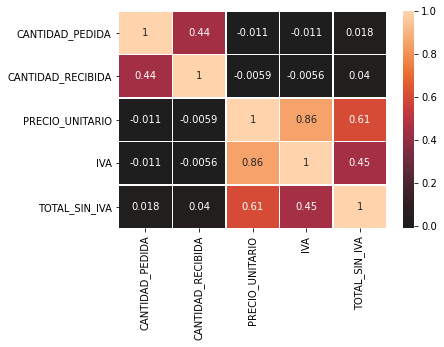

<matplotlib.axes._subplots.AxesSubplot at 0x7f4811da1910>

In [0]:
sns.heatmap(df.corr(), center=0, annot=True, linewidths=.5)

In [0]:
df.describe()

Out[1124]:

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
count,"22,392.00","22,392.00","22,392.00","22,392.00","22,392.00"
mean,196.68,49.52,"74,075.30","11,499.70","477,559.00"
std,"1,976.19",880.83,"644,263.69","104,931.32","3,160,637.50"
min,0.27,0.00,0.00,0.00,0.00
25%,2.00,0.00,"1,861.00",93.00,"29,412.00"
50%,7.00,2.00,"11,400.00","1,040.00","90,756.00"
75%,40.00,10.00,"32,222.00","5,588.00","294,118.00"
max,"120,000.00","53,620.00","33,242,814.00","6,316,135.00","299,185,312.00"


In [0]:
df.shape

Out[1125]: (22392, 12)

In [0]:
df.to_excel('/dbfs/mnt/data/Proveindustriales_Dic_2/Proveindustriales_completo.xls', index=False)

In [0]:
print('CATEGORÍA: ', len(df['CATEGORÍA'].unique()))
print('SUBCATEGORIA: ', len(df['SUBCATEGORIA'].unique()))
print('PROVEEDOR: ', len(df['PROVEEDOR'].unique()))
print('PORTAL: ', len(df['PORTAL'].unique()))
print('PRODUCTO_O_SERVICIO: ', len(df['PRODUCTO_O_SERVICIO'].unique()))

CATEGORÍA: 5
SUBCATEGORIA: 8
PROVEEDOR: 4
PORTAL: 5
PRODUCTO_O_SERVICIO: 8

# 8. TRANSFORMATION

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

## Numeric to Normalized values

In [0]:
df_numeric = df.select_dtypes(['int32', 'int64', 'float32', 'float64'])
df_numeric

Out[1129]:

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,2.00,0.00,"23,364.00","4,439.00","46,728.00"
1,1.00,1.00,"1,476,972.00","280,625.00","1,476,972.00"
2,10.00,0.00,"15,500.00",0.00,"155,000.00"
3,50.00,0.00,"22,000.00",0.00,"1,100,000.00"
4,7.00,7.00,"92,084.00","17,496.00","644,588.00"
...,...,...,...,...,...
23078,8.00,8.00,"33,613.00","6,387.00","268,908.00"
23079,1.00,1.00,588.00,112.00,588.00
23080,3.00,3.00,"29,412.00","5,588.00","88,235.00"
23081,4.00,4.00,"29,412.00","5,588.00","117,647.00"


In [0]:
df_numeric.describe()

Out[1130]:

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
count,"22,392.00","22,392.00","22,392.00","22,392.00","22,392.00"
mean,196.68,49.52,"74,075.30","11,499.70","477,559.00"
std,"1,976.19",880.83,"644,263.69","104,931.32","3,160,637.50"
min,0.27,0.00,0.00,0.00,0.00
25%,2.00,0.00,"1,861.00",93.00,"29,412.00"
50%,7.00,2.00,"11,400.00","1,040.00","90,756.00"
75%,40.00,10.00,"32,222.00","5,588.00","294,118.00"
max,"120,000.00","53,620.00","33,242,814.00","6,316,135.00","299,185,312.00"


In [0]:
normalizer = Normalizer()
df_numeric_normalized = pd.DataFrame(normalizer.fit_transform(df_numeric), columns=df_numeric.columns)

In [0]:
df_numeric_normalized.describe()

Out[1132]:

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
count,"22,392.00","22,392.00","22,392.00","22,392.00","22,392.00"
mean,0.00,0.00,0.25,0.04,0.92
std,0.04,0.02,0.26,0.05,0.12
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.02,0.00,0.89
50%,0.00,0.00,0.14,0.01,0.99
75%,0.00,0.00,0.45,0.06,1.00
max,1.00,0.71,0.97,0.17,1.00


## Categorical to OneHotEncoder

Drop PRODUCTO_O_SERVICIO Delete. if you want to try, delete PRODUCTO_O_SERVICIO too (it has a lot of categories)

In [0]:
df_categorical = df.select_dtypes(['object'])
df_categorical = df_categorical.loc[:, (df_categorical.columns != 'PRODUCTO_O_SERVICIO') & (df_categorical.columns != 'ESTADO')]
df_categorical.head(3)

Out[1133]:

,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,PORTAL
0,Otros,Otros,Otros,Portal comprador 1
1,Otros,Otros,Otros,Portal comprador 1
2,Alimentos y Bebidas,Alimentos preparados y conservados,Otros,Portal comprador 1


In [0]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_Cols = pd.DataFrame(OH_encoder.fit_transform(df_categorical))

In [0]:
OH_Cols.columns =  OH_encoder.get_feature_names(df_categorical.columns)

In [0]:
pd.options.display.float_format = '{:,.2f}'.format

In [0]:
OH_Cols

Out[1137]:

,CATEGORÍA_Alimentos y Bebidas,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Otros,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORIA_Alimentos preparados y conservados,SUBCATEGORIA_Bebidas,SUBCATEGORIA_Elementos de aseo y limpieza,SUBCATEGORIA_Elementos de papelería,SUBCATEGORIA_Otros,SUBCATEGORIA_Productos de carne y aves de corral,SUBCATEGORIA_Productos lácteos y huevos,SUBCATEGORIA_Seguridad y protección personal,PROVEEDOR_Otros,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,PORTAL_Otros,PORTAL_Portal comprador 1,PORTAL_Portal comprador 2,PORTAL_Portal comprador 24,PORTAL_Portal comprador 29
0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22387,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
22388,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
22389,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
22390,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


# CONCAT ONEHOTENCODER WITH NORMALIZED

In [0]:
df_num_encoder_normalized = pd.concat([OH_Cols, df_numeric_normalized], axis=1)
df_num_encoder_normalized

Out[1138]:

,CATEGORÍA_Alimentos y Bebidas,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Otros,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORIA_Alimentos preparados y conservados,SUBCATEGORIA_Bebidas,SUBCATEGORIA_Elementos de aseo y limpieza,SUBCATEGORIA_Elementos de papelería,SUBCATEGORIA_Otros,SUBCATEGORIA_Productos de carne y aves de corral,SUBCATEGORIA_Productos lácteos y huevos,SUBCATEGORIA_Seguridad y protección personal,PROVEEDOR_Otros,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,PORTAL_Otros,PORTAL_Portal comprador 1,PORTAL_Portal comprador 2,PORTAL_Portal comprador 24,PORTAL_Portal comprador 29,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.45,0.08,0.89
1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.70,0.13,0.70
2,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.10,0.00,1.00
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.02,0.00,1.00
4,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.03,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22387,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.02,0.99
22388,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.13,0.70
22389,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.06,0.95
22390,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.24,0.05,0.97


In [0]:
df_num_encoder_normalized.describe()

Out[1139]:

,CATEGORÍA_Alimentos y Bebidas,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Otros,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORIA_Alimentos preparados y conservados,SUBCATEGORIA_Bebidas,SUBCATEGORIA_Elementos de aseo y limpieza,SUBCATEGORIA_Elementos de papelería,SUBCATEGORIA_Otros,SUBCATEGORIA_Productos de carne y aves de corral,SUBCATEGORIA_Productos lácteos y huevos,SUBCATEGORIA_Seguridad y protección personal,PROVEEDOR_Otros,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,PORTAL_Otros,PORTAL_Portal comprador 1,PORTAL_Portal comprador 2,PORTAL_Portal comprador 24,PORTAL_Portal comprador 29,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
count,"22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00"
mean,0.31,0.17,0.05,0.20,0.27,0.10,0.06,0.09,0.07,0.34,0.04,0.03,0.27,0.62,0.06,0.24,0.07,0.14,0.29,0.17,0.24,0.15,0.00,0.00,0.25,0.04,0.92
std,0.46,0.38,0.23,0.40,0.44,0.30,0.24,0.29,0.26,0.47,0.18,0.18,0.44,0.48,0.24,0.43,0.25,0.35,0.46,0.38,0.43,0.36,0.04,0.02,0.26,0.05,0.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.89
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.01,0.99
75%,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.45,0.06,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.71,0.97,0.17,1.00


# SAVE TO CSV

In [0]:
df_num_encoder_normalized.to_csv('/dbfs/mnt/data/Proveindustriales_Dic_2/Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv', index=False)